# **General imports**

In [920]:
########### Basic modules for data manipulation ##################
import numpy as np
import pandas as pd
########## Data visualization modules ############################
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
######### Statistical modules #####################################
from scipy.stats import shapiro,kstest,skew,kurtosis,ttest_ind,mannwhitneyu,probplot,boxcox,norm,normaltest,yeojohnson
import statsmodels.api as sm
######### Feature engineering imports #############################
from sklearn.ensemble import IsolationForest,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler,Normalizer
######### Warnings deprecation ####################################
import warnings
######### Modeling imports ########################################
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier,VotingClassifier,RandomForestClassifier
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import pickle

In [782]:
warnings.filterwarnings("ignore")

In [783]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [784]:
pio.renderers.default = "notebook_connected"

In [785]:
sns.set("paper","ticks")
sns.color_palette("tab10")
rcParams['figure.figsize'] = 16,8

In [786]:
df = pd.read_csv("/content/drive/My Drive/Lol data/high_diamond_ranked_10min.csv")

Let's get a quick view of the data aswell as some metrics about every column

In [787]:
df.head()

gameId  blueWins  ...  redCSPerMin  redGoldPerMin
0  4519157822         0  ...         19.7         1656.7
1  4523371949         0  ...         24.0         1762.0
2  4521474530         0  ...         20.3         1728.5
3  4524384067         0  ...         23.5         1647.8
4  4436033771         0  ...         22.5         1740.4

[5 rows x 40 columns]

In [788]:
df.describe()

gameId     blueWins  ...  redCSPerMin  redGoldPerMin
count  9.879000e+03  9879.000000  ...  9879.000000    9879.000000
mean   4.500084e+09     0.499038  ...    21.734923    1648.904140
std    2.757328e+07     0.500024  ...     2.191167     149.088841
min    4.295358e+09     0.000000  ...    10.700000    1121.200000
25%    4.483301e+09     0.000000  ...    20.300000    1542.750000
50%    4.510920e+09     0.000000  ...    21.800000    1637.800000
75%    4.521733e+09     1.000000  ...    23.300000    1741.850000
max    4.527991e+09     1.000000  ...    28.900000    2273.200000

[8 rows x 40 columns]

In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

As we can see, we have columns related to both of the teams in the same game. That means that we can safely delete columns related to one of the teams.

In [790]:
blue = [column for column in df.columns if column[:4] == "blue"]
red = [column for column in df.columns if column[:4] != "blue"]

In [791]:
df = df.drop(columns=red)

In [792]:
df.columns = [column[4:] for column in df.columns]

In [793]:
df.head()

Wins  WardsPlaced  WardsDestroyed  ...  ExperienceDiff  CSPerMin  GoldPerMin
0     0           28               2  ...              -8      19.5      1721.0
1     0           12               1  ...           -1173      17.4      1471.2
2     0           15               0  ...           -1033      18.6      1611.3
3     0           43               1  ...              -7      20.1      1515.7
4     0           75               4  ...             230      21.0      1640.0

[5 rows x 20 columns]

We can see that we still have some of the columns to remove since there are a lot of variables related to the same aspect of the game like gold or experience. I decided to opt out of using the GoldPerMin,TotalGold,TotalExperience column since they describe the same story as the other ones related to the gold and XP. In my opinion The difference of these variables will be the significant in differatiating the winning team.

In [794]:
df.drop(columns=["TotalGold","GoldPerMin","TotalExperience"],inplace=True)

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      9879 non-null   int64  
 1   WardsPlaced               9879 non-null   int64  
 2   WardsDestroyed            9879 non-null   int64  
 3   FirstBlood                9879 non-null   int64  
 4   Kills                     9879 non-null   int64  
 5   Deaths                    9879 non-null   int64  
 6   Assists                   9879 non-null   int64  
 7   EliteMonsters             9879 non-null   int64  
 8   Dragons                   9879 non-null   int64  
 9   Heralds                   9879 non-null   int64  
 10  TowersDestroyed           9879 non-null   int64  
 11  AvgLevel                  9879 non-null   float64
 12  TotalMinionsKilled        9879 non-null   int64  
 13  TotalJungleMinionsKilled  9879 non-null   int64  
 14  GoldDiff

In [796]:
df.describe()

Wins  WardsPlaced  ...  ExperienceDiff     CSPerMin
count  9879.000000  9879.000000  ...     9879.000000  9879.000000
mean      0.499038    22.288288  ...      -33.620306    21.669956
std       0.500024    18.019177  ...     1920.370438     2.185844
min       0.000000     5.000000  ...    -9333.000000     9.000000
25%       0.000000    14.000000  ...    -1290.500000    20.200000
50%       0.000000    16.000000  ...      -28.000000    21.800000
75%       1.000000    20.000000  ...     1212.000000    23.200000
max       1.000000   250.000000  ...     8348.000000    28.300000

[8 rows x 17 columns]

**Exploratory Data Analysis**
===



---


Let's start by getting some insight of how our data looks in each of the columns

In [797]:
def plot_countplot(df,x):
  sns.countplot(x=x,data = df)
  plt.title("Distribution of {} values".format(x))
  plt.show()

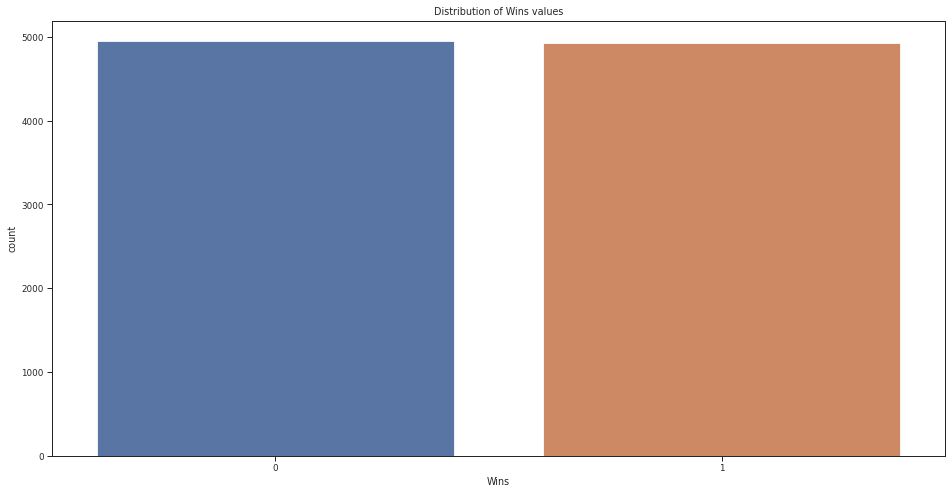

In [798]:
plot_countplot(df,"Wins")

Okay. Our dependent variable has the same number of records for each of the class. That means we don't have to apply any balancing of our target variable (like SMOTE or undersampling etc.)

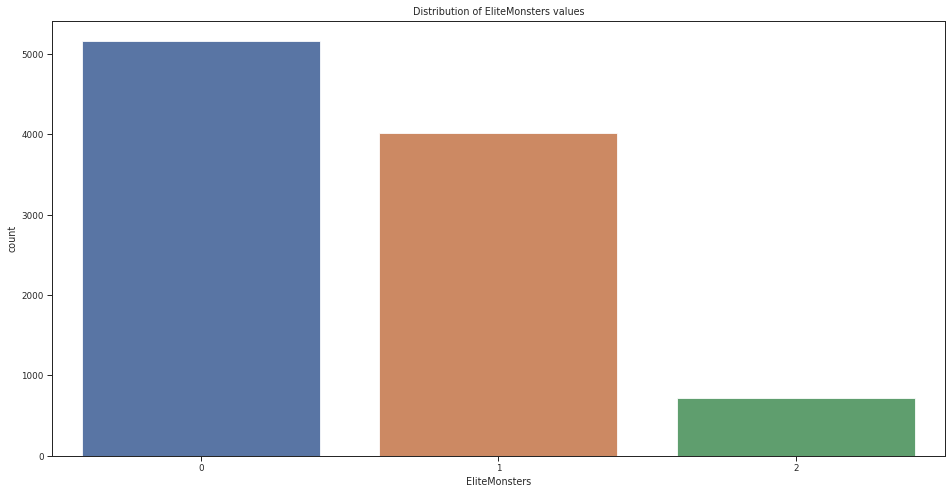

In [799]:
plot_countplot(df,"EliteMonsters")

This plot shows that in most of the games noone of the elite monsters (dragons/heralds) are slayed in the first 10 minutes of the game. That generally makes sense since your team has to be really ahead to kill one of those in the early game.

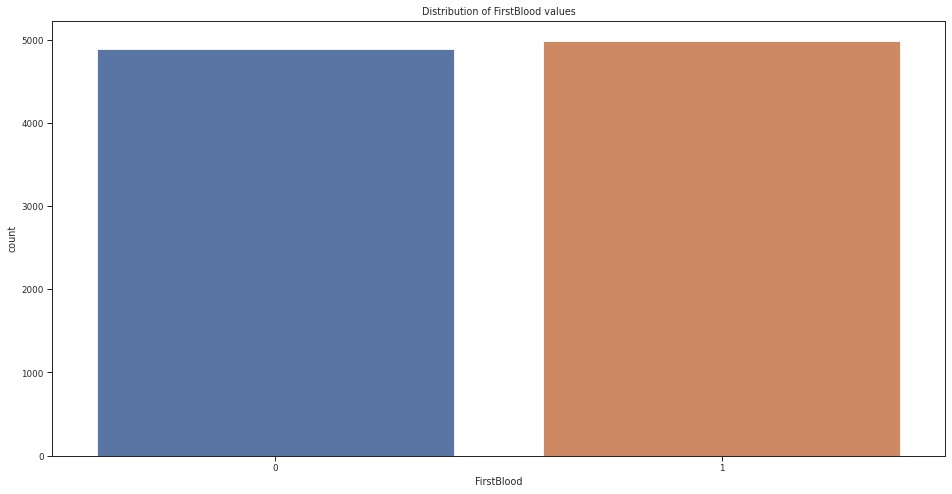

In [800]:
plot_countplot(df,"FirstBlood")

Our first blood column is also very balanced across the game we have the data on.

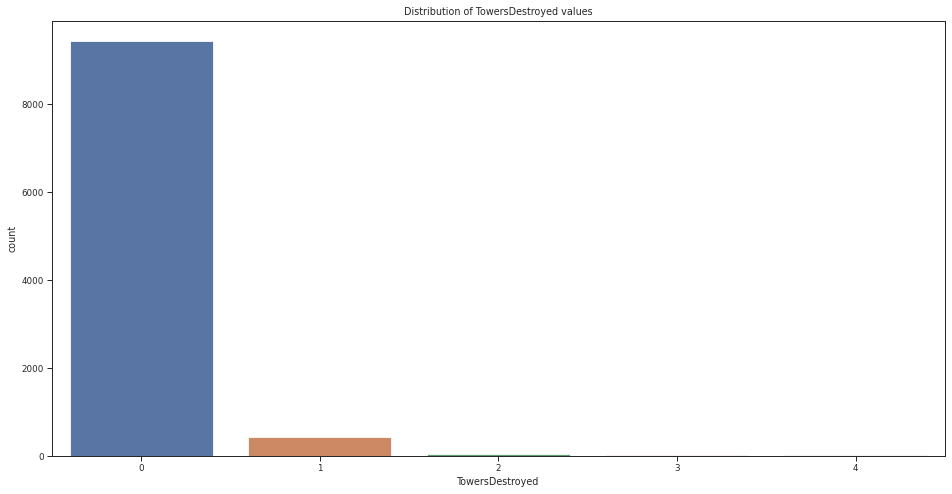

In [801]:
plot_countplot(df,"TowersDestroyed")

Just like with the elite monsters, in most of the games the team does not destroy any towers in the first 10 minutes. Although here this trend is much more apparent. It's very hard to destroy the opponents tower in the early stages of the game

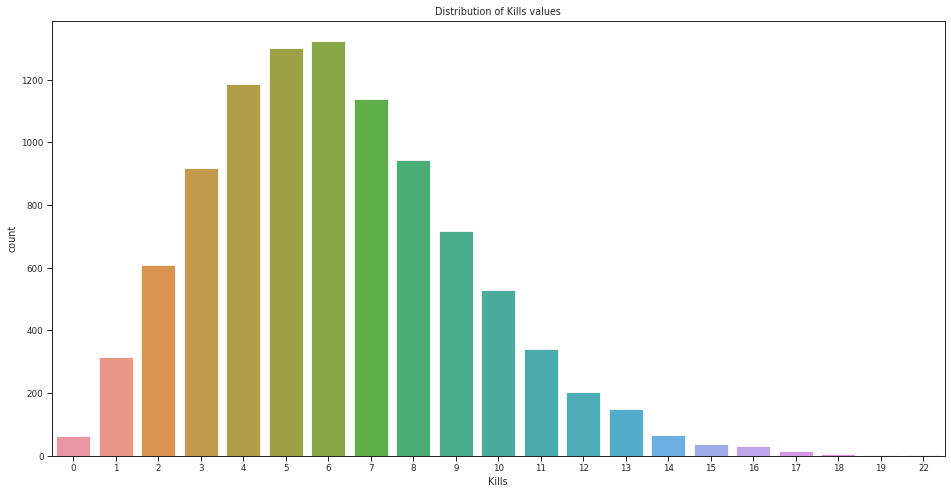

In [802]:
plot_countplot(df,"Kills")

The kills variable is slightly right-skewed. Later on we will definitely look into it. We might be able to transform this data to fit the normal distribution better.

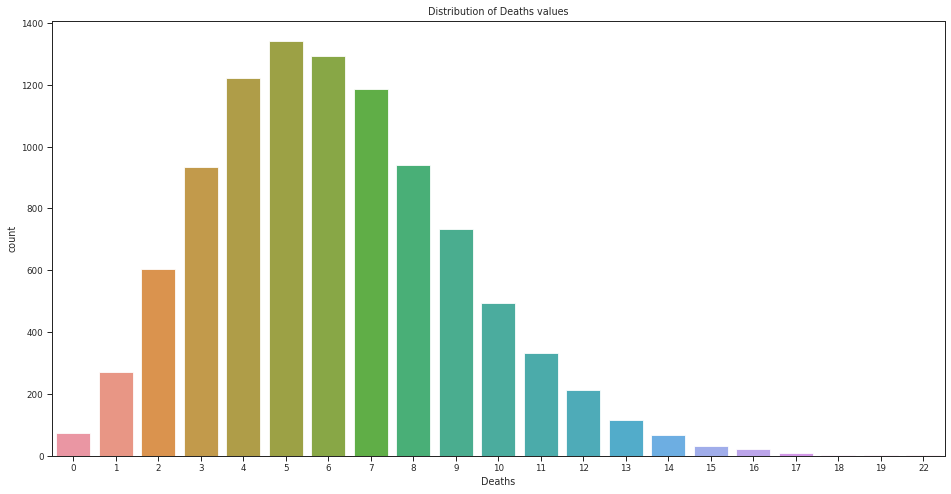

In [803]:
plot_countplot(df,"Deaths")

Same situation as with the kills column. We'll look into those later on.

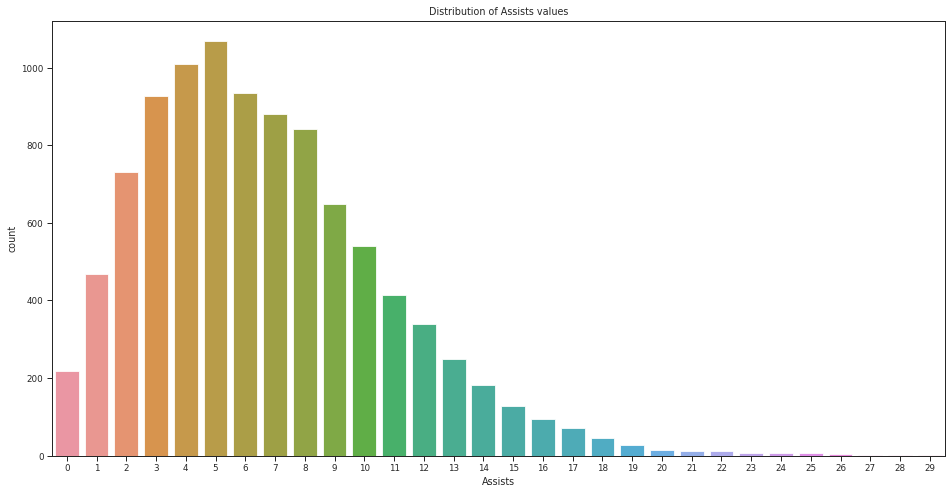

In [804]:
plot_countplot(df,"Assists")

Same as two previous ones..


---



Next I would like to look at the histograms, that will allow us to view the distribution of our variables. We looked at the distribution of some of our variables already, but now I would like to explore how they differ with relation to our target variable.

In [805]:
def plot_histogram(x0,x1 = None):
  fig = go.Figure()
  if x1 is not None:
    fig.add_trace(go.Histogram(x=x0,name="Lost",histnorm='probability'))
    fig.add_trace(go.Histogram(x=x1,name="Won",histnorm='probability'))
  else:
    fig.add_trace(go.Histogram(x=x0,histnorm='probability'))
  fig.update_layout(barmode='overlay',title="{}".format(x0.name))
  fig.update_traces(opacity=0.5)
  fig.show()

In [806]:
def calculate_cohen_d(dist_1,dist_2):
  d = (np.average(dist_1) - np.average(dist_2))/np.sqrt((len(dist_1) * np.var(dist_1) + len(dist_2) * np.var(dist_2))/(len(dist_1) + len(dist_2) - 2))
  print("Absolute value of Cohen's d: {}\n{} effect size".format(np.abs(d),
                                                                 "Very Low" if (np.abs(d) <= 0.2) else 
                                                                 "Low" if (np.abs(d) > 0.2 and np.abs(d) <= 0.5) else 
                                                                 "Medium" if (np.abs(d) > 0.5 and np.abs(d) <= 0.8) else 
                                                                 "High"))

In [807]:
plot_histogram(df["TotalMinionsKilled"])

In [808]:
print("Skewness: {}\nKurtosis: {}".format(skew(df["TotalMinionsKilled"]),kurtosis(df["TotalMinionsKilled"])))

Skewness: -0.2677301246253411
Kurtosis: 0.17192771718003508


As we can see, the amount of minions killed in total by the team is generally normally distributed with a slight left skew and lighter tails. Let's now view how it differs based on the fact if they won or not.

In [809]:
plot_histogram(df[df["Wins"] == 0]["TotalMinionsKilled"],df[df["Wins"] == 1]["TotalMinionsKilled"])

In [810]:
calculate_cohen_d(df[df["Wins"] == 0]["TotalMinionsKilled"],df[df["Wins"] == 1]["TotalMinionsKilled"])

Absolute value of Cohen's d: 0.46160060462172187
Low effect size


We can see that these to distributions overlap a lot. But what's interesting is that on average the winning team kills more minions in the early stage of the game. This is of course pretty logical. As we kill more minions, we gain more gold, we get more items etc. So good CS'ing in the early game can definitely pay off in the end.

In [811]:
plot_histogram(df["WardsPlaced"])

In [812]:
print("Skewness: {}\nKurtosis: {}".format(skew(df["WardsPlaced"]),kurtosis(df["WardsPlaced"])))

Skewness: 4.135724526355017
Kurtosis: 23.42698275598882


Next up is the amount of wards placed in total by the team in the first 10 minutes of the game. We can see that it generally peaks at 16 wards and a smaller spike at 38. We can also note the high kurtosis number which might imply on potential outlier existence.

In [813]:
plot_histogram(df[df["Wins"] == 0]["WardsPlaced"],df[df["Wins"] == 1]["WardsPlaced"])

In [814]:
calculate_cohen_d(df[df["Wins"] == 0]["WardsPlaced"],df[df["Wins"] == 1]["WardsPlaced"])

Absolute value of Cohen's d: 0.00017388490217490105
Very Low effect size


Ok These distribution basically overlap.. What is also interesting is these points above 50 wards placed. We can see that in some of the games some team placed even 250 wards! We will have to look into that when we deal with the outliers if we decide to use that variable in our modelling.

In [815]:
plot_histogram(df["GoldDiff"])

In [816]:
print("Skewness: {}\nKurtosis: {}".format(skew(df["GoldDiff"]),kurtosis(df["GoldDiff"])))

Skewness: 0.030032947758477136
Kurtosis: 0.29865009594218206


As we can see the Gold difference between the teams in each of the games is normally distributed with lighter tails. What we would expect to see is the big difference of the value of gold difference between the victorious team and the defeated one. Let's see if that is the case.

In [817]:
plot_histogram(df[df["Wins"] == 0]["GoldDiff"],df[df["Wins"] == 1]["GoldDiff"])

In [818]:
calculate_cohen_d(df[df["Wins"] == 0]["GoldDiff"],df[df["Wins"] == 1]["GoldDiff"])

Absolute value of Cohen's d: 1.1892085126231577
High effect size


That is definitely right based on this histogram. That's a good information, because we can relate the early game advantage with winning the entire game.

In [819]:
plot_histogram(df["WardsDestroyed"])

In [820]:
print("Skewness: {}\nKurtosis: {}".format(skew(df["WardsPlaced"]),kurtosis(df["WardsPlaced"])))

Skewness: 4.135724526355017
Kurtosis: 23.42698275598882


Here we can see a that the distribution of the amount of wards destroyed by the team is right skewed. Later on, We will try to apply some type of transformation to help to normalize the distribution

In [821]:
plot_histogram(df[df["Wins"] == 0]["WardsDestroyed"],df[df["Wins"] == 1]["WardsDestroyed"])

In [822]:
calculate_cohen_d(df[df["Wins"] == 0]["WardsDestroyed"],df[df["Wins"] == 1]["WardsDestroyed"])

Absolute value of Cohen's d: 0.08857155686399043
Very Low effect size


This situation is really similar to the distribution of wards placed. Two histograms basically fully overlap. What we can take from this is that the amount of wards destroyed by the team does not have an impact on the outcome of the game. That's a pretty bold statement to take right now though.. We will try to uncover this later on.

In [823]:
plot_histogram(df["Kills"])

In [824]:
print("Skewness: {}\nKurtosis: {}".format(skew(df["Kills"]),kurtosis(df["Kills"])))

Skewness: 0.5384357694128469
Kurtosis: 0.26304741942806276


The distribution of the amount of kills is definitely right skewed. As with the others We will try to apply some of the transformation techniques to change that. But what is more important for now is to relate this distribution to the dependent variable.

In [825]:
plot_histogram(df[df["Wins"] == 0]["Kills"],df[df["Wins"] == 1]["Kills"])

In [826]:
calculate_cohen_d(df[df["Wins"] == 0]["Kills"],df[df["Wins"] == 1]["Kills"])

Absolute value of Cohen's d: 0.7166613132664704
Medium effect size


We can see the relationship between the amount of kills in the early game and winning the game. Team who manages to kill the opponents more tends to win more often. Again we will look more deeply into that later on But it's important to keep it in our heads for now.

In [827]:
plot_histogram(df["Assists"])

In [828]:
print("Skewness: {}\nKurtosis: {}".format(skew(df["Assists"]),kurtosis(df["Assists"])))

Skewness: 0.8901260116268362
Kurtosis: 1.1579206323099154


In [829]:
plot_histogram(df[df["Wins"] == 0]["Assists"],df[df["Wins"] == 1]["Assists"])

In [830]:
calculate_cohen_d(df[df["Wins"] == 0]["Assists"],df[df["Wins"] == 1]["Assists"])

Absolute value of Cohen's d: 0.5757935218059865
Medium effect size


In [831]:
plot_histogram(df["Deaths"])

In [832]:
print("Skewness: {}\nKurtosis: {}".format(skew(df["Deaths"]),kurtosis(df["Deaths"])))

Skewness: 0.5074157612222788
Kurtosis: 0.21338197609857446


Same situation of as with the distribution of kills. 

In [833]:
plot_histogram(df[df["Wins"] == 0]["Deaths"],df[df["Wins"] == 1]["Deaths"])

In [834]:
calculate_cohen_d(df[df["Wins"] == 0]["Deaths"],df[df["Wins"] == 1]["Deaths"])

Absolute value of Cohen's d: 0.7213148791809872
Medium effect size


We can see the relationship between the amount of deaths in the early game and winning the game. Team who manages to die less often tends to win more. Again we will look more deeply into that later on But it's important to keep it in our heads for now.

In [835]:
plot_histogram(df["AvgLevel"])

In [836]:
print("Skewness: {}\nKurtosis: {}".format(skew(df["AvgLevel"]),kurtosis(df["AvgLevel"])))

Skewness: -0.3384501800570432
Kurtosis: 1.1149945958557925


The distribution of the Average Level on the team seems to be negatively skewed. Although we can see some singular observations that tend to differ from the others. We may speculate that it is an outlier But we will have to look further into it.

In [837]:
plot_histogram(df[df["Wins"] == 0]["AvgLevel"],df[df["Wins"] == 1]["AvgLevel"])

In [838]:
calculate_cohen_d(df[df["Wins"] == 0]["AvgLevel"],df[df["Wins"] == 1]["AvgLevel"])

Absolute value of Cohen's d: 0.7663051473343059
Medium effect size


What we can see here is that generally the bigger the average level in the early game The higher the chance of winning. It's pretty much the same relation that we saw earlier.


---



We've already gained some insights into our data distributions. Now let's see the distribution of some of the categorical/yes-or-no variables using bar plots. We've already did some of that But what we should do to understand our data better is to relate it to the target variable

In [839]:
def plot_bar(df,x,y):
  fig = px.bar(df, x=x, y=y)
  fig.update_traces(marker_color='rgb(107,142,35)', marker_line_color='rgb(47,79,79)',
                  marker_line_width=1.5, opacity=0.4)
  fig.show()

In [840]:
plot_bar(df[["FirstBlood","Wins"]].groupby("FirstBlood").mean().reset_index(),"FirstBlood","Wins")

Ok So this is interesting Since we can see that 60 % of the times the team who got first blood also won their game. That might be an important thing to note when you're playing the game. Gaining the advantage early on and going for aggresive plays might be beneficial in the long run.

In [841]:
plot_bar(df[["EliteMonsters","Wins"]].groupby("EliteMonsters").mean().reset_index(),"EliteMonsters","Wins")

What we can see from here is that there is a generally bigger chance of winning the game if you managed to slay at least one of the epic monsters. Although we have to keep in mind how underrespresented the class 2 is in our data set. Based on that we can't really take this relationship as confidenetely as others, but what we can say is that slaying at least one monster in the early game has an significant impact on winning the game.

In [842]:
plot_bar(df[["Dragons","Wins"]].groupby("Dragons").mean().reset_index(),"Dragons","Wins")

In [843]:
plot_bar(df[["Heralds","Wins"]].groupby("Heralds").mean().reset_index(),"Heralds","Wins")

This to columns are basically combined into the Elite monsters column we've already explored. Although I think it's important to look on them on their own and see which elite monster is more important to prioritize in the early game. But we don't really see much difference. There is a slight higher value of won games when the team killed the dragon but it is not significant enough to go for one of these objectives in particular.

In [844]:
plot_bar(df[["TowersDestroyed","Wins"]].groupby("TowersDestroyed").mean().reset_index(),"TowersDestroyed","Wins")

Here we can notice pretty similar relationship as with the Elite monsters killed. But here we have to keep in mind that this variable is highly imbalanced.

In [845]:
df["TowersDestroyed"].value_counts()

0    9415
1     429
2      27
3       7
4       1
Name: TowersDestroyed, dtype: int64

In [846]:
np.var(df["TowersDestroyed"])

0.05971024577055825

As we can see this column mostly contains data points of games in which none towers were destroyed in the early game. Very low variance and the fact that all the quartiles are 0 also builds onto this. At this point I wouldn't be too confident about using this feature in the final modelling proccess, but we will try to look further into it.

---



In [847]:
plot_bar(df[["WardsPlaced","Wins"]].groupby("Wins").mean().reset_index(),"Wins","WardsPlaced")

That one is highly suprising to me. On average, amount of the wards placed in the early game does not actually contribute to winning the game.

In [848]:
plot_bar(df[["WardsDestroyed","Wins"]].groupby("Wins").mean().reset_index(),"Wins","WardsDestroyed")

Same with the amount of destroyed wards.. Does the vision control in the early game not matter?

In [849]:
plot_bar(df[['TotalJungleMinionsKilled',"Wins"]].groupby("Wins").mean().reset_index(),"Wins",'TotalJungleMinionsKilled')

We've already managed to explore our data quite a bit. We learned about distributions of our data columns, gained some information about possible outliers and found out about some of the correlation to the target variable. Let's explore that last part a bit more with the bivariate analysis.

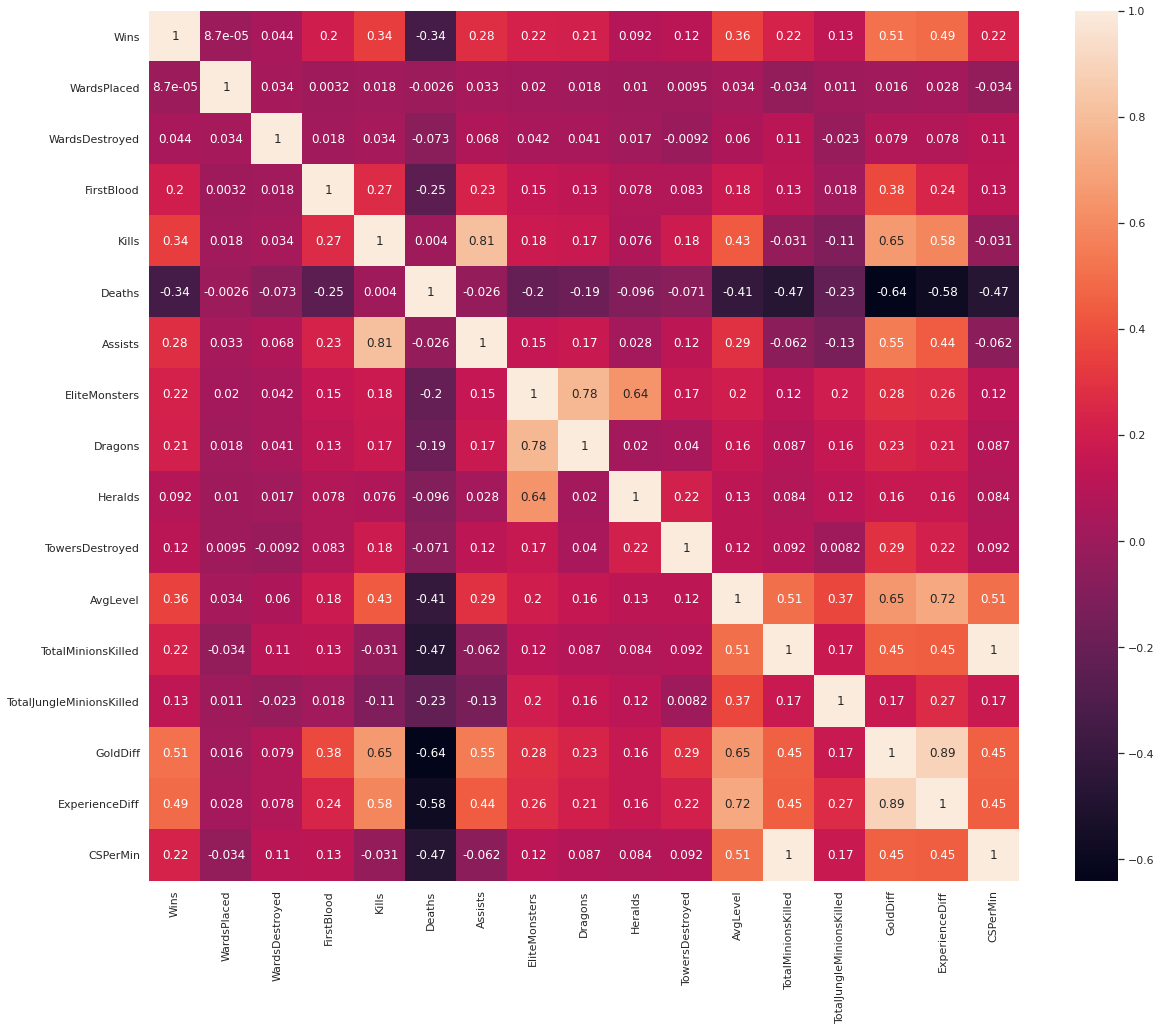

In [850]:
sns.set(font_scale=1)
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, vmax=1, square=True,annot = True)

This Pearson correlation heatmap provides with a lot of information, some that we've already knew and some new relationships. We definitely have some mulitcolinearity going on. That's something that we might have to take care of in the feature engineering step. Let's look strictly into the Pearson correlation coefficients related to our dependent variable.

In [851]:
corr_matrix["Wins"].apply(lambda x: np.abs(x)).sort_values(ascending = False)[1:10]

GoldDiff              0.511119
ExperienceDiff        0.489558
AvgLevel              0.357820
Deaths                0.339297
Kills                 0.337358
Assists               0.276685
TotalMinionsKilled    0.224909
CSPerMin              0.224909
EliteMonsters         0.221944
Name: Wins, dtype: float64

In [852]:
corr_matrix["GoldDiff"].apply(lambda x: np.abs(x)).sort_values(ascending = False)[1:10]

ExperienceDiff        0.894729
Kills                 0.654148
AvgLevel              0.653538
Deaths                0.640000
Assists               0.549761
Wins                  0.511119
TotalMinionsKilled    0.450497
CSPerMin              0.450497
FirstBlood            0.378511
Name: GoldDiff, dtype: float64

In [853]:
df = df[["GoldDiff","Kills","Assists","Deaths","CSPerMin","TotalJungleMinionsKilled","AvgLevel","EliteMonsters","WardsPlaced","WardsDestroyed","FirstBlood","Wins"]]

Let's now see some scatter plots, but we will also relate it to our target variable, which may encover some patterns.

In [854]:
def plot_bubble_chart(df,x,y,color=None):
  fig = px.scatter(df, x=x, y=y,
         color = color,color_continuous_scale=["red", "green", "blue"])
  fig.update_layout(
  title='{} vs {}'.format(x,y),
  xaxis=dict(
      title=x,
      gridcolor='white',
      gridwidth=2,
  ),
  yaxis=dict(
      title=y,
      gridcolor='white',
      gridwidth=2,
  ),
  paper_bgcolor='rgb(255,255,255)',
  plot_bgcolor='rgb(255,255,255)',
  height = 800,
  width = 1500
  )
  fig.show()

In [855]:
plot_bubble_chart(df,"Kills","Deaths","Wins")

In [856]:
plot_bubble_chart(df,"GoldDiff","CSPerMin","Wins")

In [857]:
plot_bubble_chart(df,"GoldDiff","CSPerMin","Kills")

In [858]:
plot_bubble_chart(df,"GoldDiff","Kills","EliteMonsters")

In [859]:
plot_bubble_chart(df,"GoldDiff","CSPerMin","FirstBlood")

In [860]:
plot_bubble_chart(df,"GoldDiff","WardsPlaced","Wins")

In [861]:
plot_bubble_chart(df,"Kills","WardsPlaced","Wins")

In [862]:
plot_bubble_chart(df,"GoldDiff","WardsPlaced","Kills")

In [863]:
plot_bubble_chart(df,"GoldDiff","WardsDestroyed","Wins")

After exploring each of the distributions and their relation to the dependent variable, we should look into the other step of **univariate** data exploration which is outlier detection. Let's start with plotting some boxplots of our data set and also relate it to our dependent variable.

In [864]:
def plot_boxplot(df,y,x=None):
  if x is not None:
    fig = px.box(df, x=x, y=y,title="{} and {}".format(y,x))
    fig.show()
  else:
    fig = px.box(df, x=x, y=y,title=y)
    fig.show()

In [865]:
plot_boxplot(df,"Kills")

In [866]:
plot_boxplot(df,"Kills","Wins")

In [867]:
plot_boxplot(df,"GoldDiff")

In [868]:
plot_boxplot(df,"GoldDiff","Wins")

In [869]:
plot_boxplot(df,"Deaths")

In [870]:
plot_boxplot(df,"Deaths","Wins")

In [871]:
plot_boxplot(df,"Assists")

In [872]:
plot_boxplot(df,"Assists","Wins")

In [873]:
plot_boxplot(df,"AvgLevel")

In [874]:
plot_boxplot(df,"AvgLevel","Wins")

In [875]:
plot_boxplot(df,"TotalJungleMinionsKilled")

In [876]:
plot_boxplot(df,"TotalJungleMinionsKilled","Wins")

Okay So it looks like we might have some work to do. Earlier on as we looked on the distributions we could have also saw some outliers But these plots just confirmed it. Should we delete it? Can't really say yet. We will look deeper into it later on.

## **Final thoughts**



So what can we actually take way from this exploration proccess in terms of winning more games by our early game decisions? Here is some main points that stood out to me throughout this EDA:


1.   Definitely try to get one of the epic monsters in the early game. The best scenario would be to get dragon and herald, but it's not possible in most games. In such case, it turns out that we should prioritize dragons over heralds.
2.   Towers.. Data shows that a team who is able to destroy at least one tower in the first 10 minutes of the game wins 70% of the time. Although I am not as confident on this statement as our variable was highly imbalanced.
3.   First bloods.. This one is quite interesting. What we could have saw is that getting the first kill of the game contributes to winning the game 60% of the time. It's almost the same percentage as slaying the herald in the early game.
4.   Wards.. Neither the amount of wards placed nor destroyed showed some pattern with relation to winning at the end of the game. That surprised me a bit since vision control is always so highly accented to someone who is learning the game. What might be the cause of this phenomenon is the type of data we have. This dataset consists of games played in the diamond elo. This means that players that played in these games are in the 2% best players of the whole server. That does not mean that these players don't care about vision around the map. To me this means that everyone in these games knows the importance of wards, which basically lowers their effect on the outcome of the game.



---





**Feature engineering**
===

In this section, I would like to look through the possible outliers that we've discovered in the EDA and decide what to do with those. What we should also do is to try creating some new features that might be related to our depedendent variable. I will also try to transform some of the features, so they better resemble the Gaussian distribution. It might not be a necessery step, but I intend on using the logistic regression later on, which assumes the normal distribution of error terms. Other models also tend to generalize better on the normal-like distribution of features. Finally, we will take what we've learned in the EDA and do some more exploring to choose the best subset of features for modelling.

In [877]:
df[["WardsPlaced","WardsDestroyed"]].sample(10)

WardsPlaced  WardsDestroyed
4469           18               2
7720           16               2
2241           22               5
1484           15               1
6571           43               5
11             33               2
8470           16               3
6044           15               1
6341           77               3
4503           15               2

Let me start of with creating some new features: KDA and VisionControl. KDA will be defined as (Kills + Assists)/Deaths. VisionControl will be just a sum of WardsPlaced and WardsDestroyed

In [878]:
df["KDA"] = (df["Kills"] + df["Assists"]) / df["Deaths"].apply(lambda x: x if x != 0 else 1)

In [879]:
df["VisionControl"] = df["WardsPlaced"] + df["WardsDestroyed"]

Let's explore the possible outliers again. This time let's use the Z-score method.

In [880]:
def find_outliers_z(df,num_of_v):
  sc = StandardScaler()
  df_sc = sc.fit_transform(df)
  df_sc = pd.DataFrame(df_sc,columns=df.columns)
  for c in df_sc.columns:
    print("{} lowest Z-scores for the {} column: {}\n10 highest Z-scores for the {} column: {}".format(num_of_v,c,df_sc.sort_values(by=[c])[c].values[:num_of_v+1],c,df_sc.sort_values(by=[c],ascending=False)[c].values[:num_of_v+1]))
    print("*" * 250)

In [881]:
df.columns

Index(['GoldDiff', 'Kills', 'Assists', 'Deaths', 'CSPerMin',
       'TotalJungleMinionsKilled', 'AvgLevel', 'EliteMonsters', 'WardsPlaced',
       'WardsDestroyed', 'FirstBlood', 'Wins', 'KDA', 'VisionControl'],
      dtype='object')

In [882]:
find_outliers_z(df[["WardsPlaced","WardsDestroyed","GoldDiff","Kills","Deaths","Assists","TotalJungleMinionsKilled","CSPerMin","EliteMonsters","AvgLevel","KDA","VisionControl"]],10)

10 lowest Z-scores for the WardsPlaced column: [-0.95948687 -0.95948687 -0.84848839 -0.79298915 -0.79298915 -0.79298915
 -0.79298915 -0.79298915 -0.79298915 -0.79298915 -0.79298915]
10 highest Z-scores for the WardsPlaced column: [12.63782712 11.02834914 10.36235825 10.0293628   9.7518666   9.03037647
  8.91937799  8.5308833   8.03139013  7.92039165  7.86489241]
**********************************************************************************************************************************************************************************************************************************************************
10 lowest Z-scores for the WardsDestroyed column: [-1.2988626 -1.2988626 -1.2988626 -1.2988626 -1.2988626 -1.2988626
 -1.2988626 -1.2988626 -1.2988626 -1.2988626 -1.2988626]
10 highest Z-scores for the WardsDestroyed column: [11.11556808 10.19598062  9.73618689  9.27639317  8.81659944  8.81659944
  8.35680571  8.35680571  7.89701198  7.89701198  7.89701198]
************************

So we can see that some values from certain columns lay 12 standard deviations away from the mean! To make the outlier removal process more robust I will use the Isolation Forest algorithm for anomaly detection.

In [883]:
df.shape

(9879, 14)

In [884]:
anomaly_det = IsolationForest(contamination=0.1)
X_anom,y_anom = df.loc[:,[c for c in df.columns if c != "Wins"]],df.loc[:,"Wins"]
anomaly_det.fit(X_anom)
X_anom["Anomaly"] = anomaly_det.predict(X_anom)

In [885]:
i = X_anom[X_anom["Anomaly"] != -1].index
df = X_anom.iloc[i,:]
df["Wins"] = y_anom[i]

In [886]:
df.drop(columns=["Anomaly"],inplace=True)

In [887]:
df.drop(df[df["TotalJungleMinionsKilled"] < 11].index,inplace=True)

What I would like to do now is look through generally the most used types of power transformation to make certain variables have more Gaussian-like distribution. It's definitely right to do so since I intend on using the logisitic regression algorithm in the modelling stage of the project and one of the assumptions of using it is the normal distribution of the error term. Moreover, there is proof that other ML algorithms also generalize better with the IVs following the distribution close to gaussian.

In [674]:
def plot_transform(col,type_of_transformation = "boxcox"):
  fig = plt.figure(figsize=(10,30))
  ax1 = fig.add_subplot(411)
  probplot(df[col] + 1, dist=norm,plot=ax1)
  ax1.set_title('Q-Q plot against normal distribution')
  ax2 = fig.add_subplot(412)
  sns.distplot(df[col] + 1,fit=norm,bins=20)
  ax2.set_title("Distribution before the transformation")
  ax3 = fig.add_subplot(413)
  if type_of_transformation == "boxcox":
    x, _ = boxcox(df[col] + 1)
    probplot(x, dist=norm,plot=ax3)
    ax3.set_title('Q-Q plot after {} transformation'.format(type_of_transformation))
    ax4 = fig.add_subplot(414)
    sns.distplot(x,fit=norm,bins=20)
    ax4.set_title("Distribution after transformation")
  elif type_of_transformation == "reciprocal":
    x = 1/(df[col] + 1)
    probplot(x, dist=norm,plot=ax3)
    ax3.set_title('Q-Q plot after {} transformation'.format(type_of_transformation))
    ax4 = fig.add_subplot(414)
    sns.distplot(x,fit=norm,bins=20)
    ax4.set_title("Distribution after transformation")
  elif type_of_transformation == "sqrt":
    x = np.sqrt(df[col] + 1)
    probplot(x, dist=norm,plot=ax3)
    ax3.set_title('Q-Q plot after {} transformation'.format(type_of_transformation))
    ax4 = fig.add_subplot(414)
    sns.distplot(x,fit=norm,bins=20)
    ax4.set_title("Distribution after transformation")
  elif type_of_transformation == "log":
    x= 1/np.log10(df[col] + 1)
    probplot(x, dist=norm,plot=ax3)
    ax3.set_title('Q-Q plot after {} transformation'.format(type_of_transformation))
    ax4 = fig.add_subplot(414)
    sns.distplot(x,fit=norm,bins=20)
    ax4.set_title("Distribution after transformation")
  elif type_of_transformation == "yeo":
    x, _ = yeojohnson(df[col] + 1)
    probplot(x, dist=norm,plot=ax3)
    ax3.set_title('Q-Q plot after {} transformation'.format(type_of_transformation))
    ax4 = fig.add_subplot(414)
    sns.distplot(x,fit=norm,bins=20)
    ax4.set_title("Distribution after transformation")
  elif type_of_transformation == "exp":
    x = (df[col] + 1)**(1/5)
    probplot(x, dist=norm,plot=ax3)
    ax3.set_title('Q-Q plot after {} transformation'.format(type_of_transformation))
    ax4 = fig.add_subplot(414)
    sns.distplot(x,fit=norm,bins=20)
    ax4.set_title("Distribution after transformation")

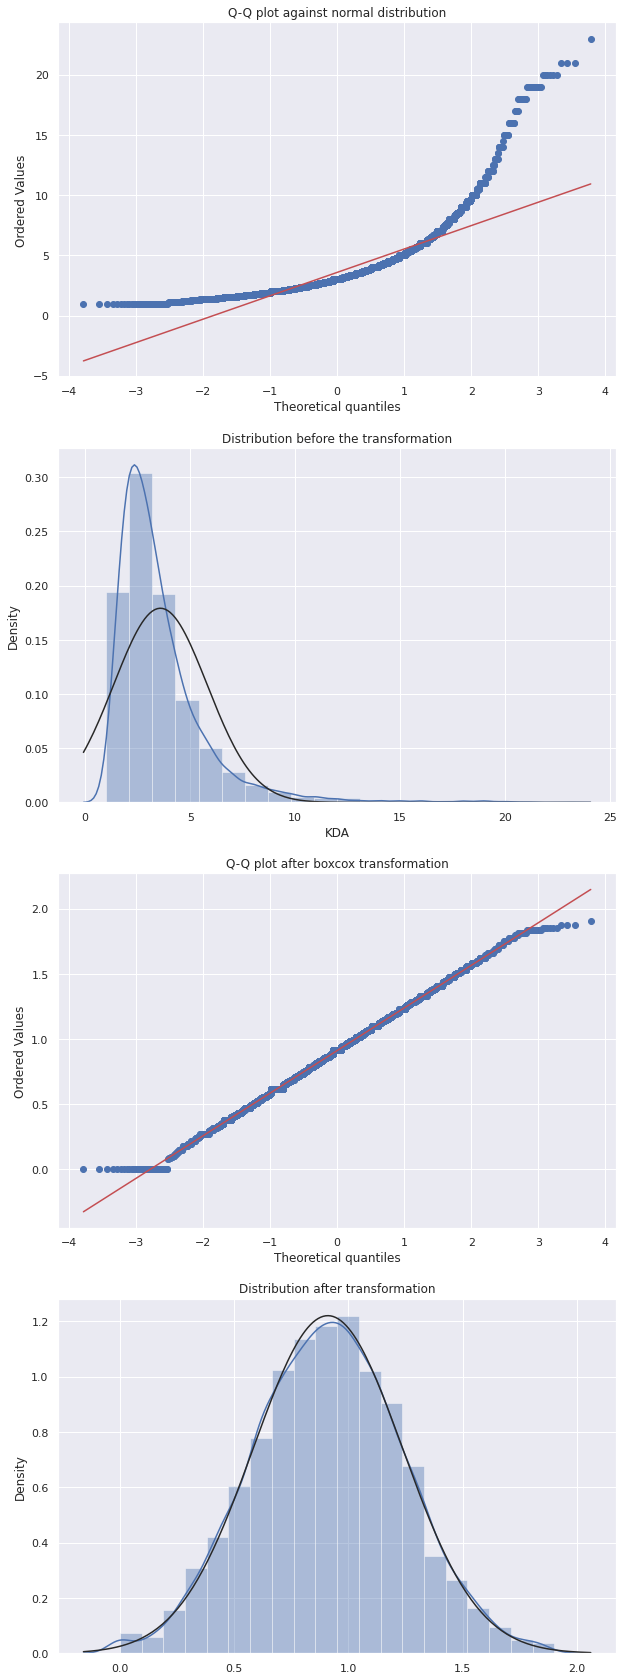

In [888]:
plot_transform("KDA","boxcox")

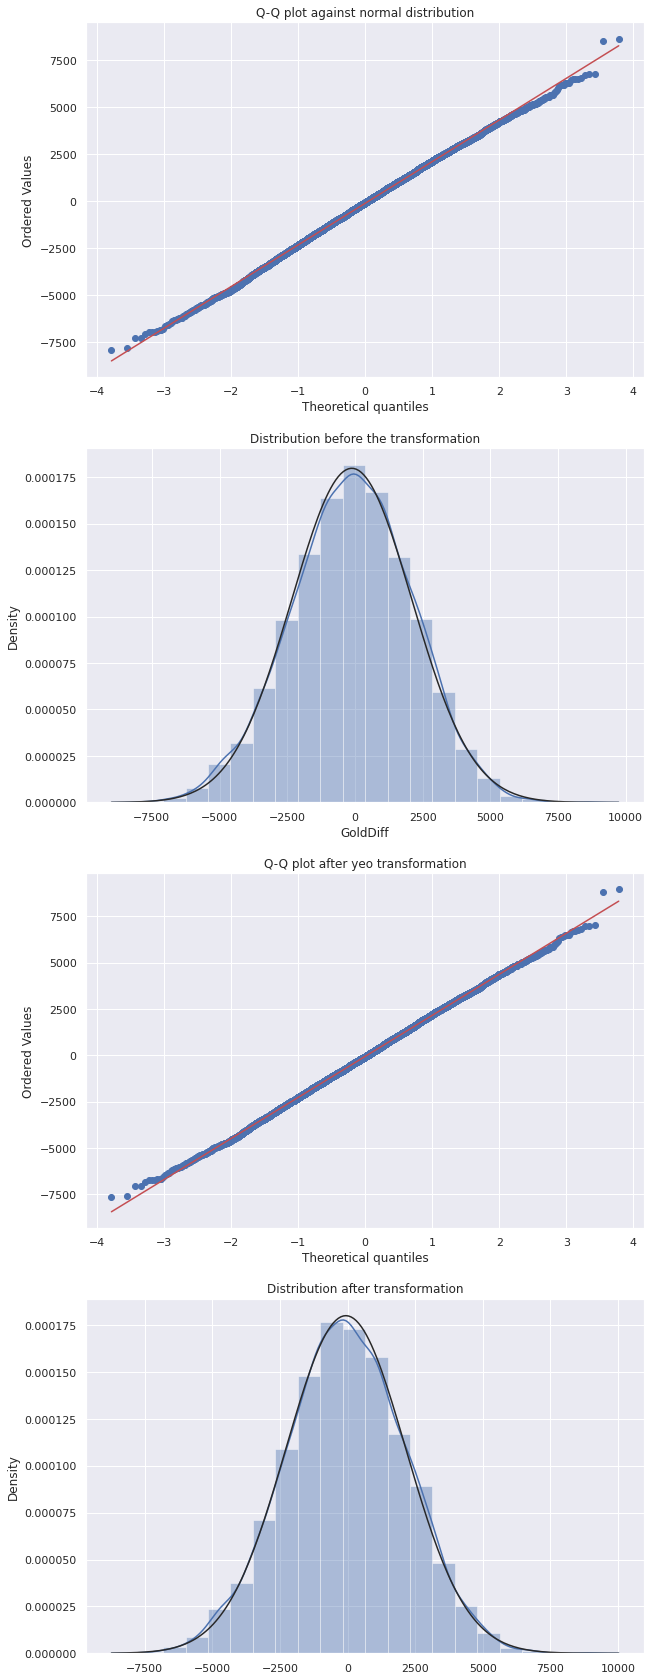

In [889]:
plot_transform("GoldDiff","yeo")

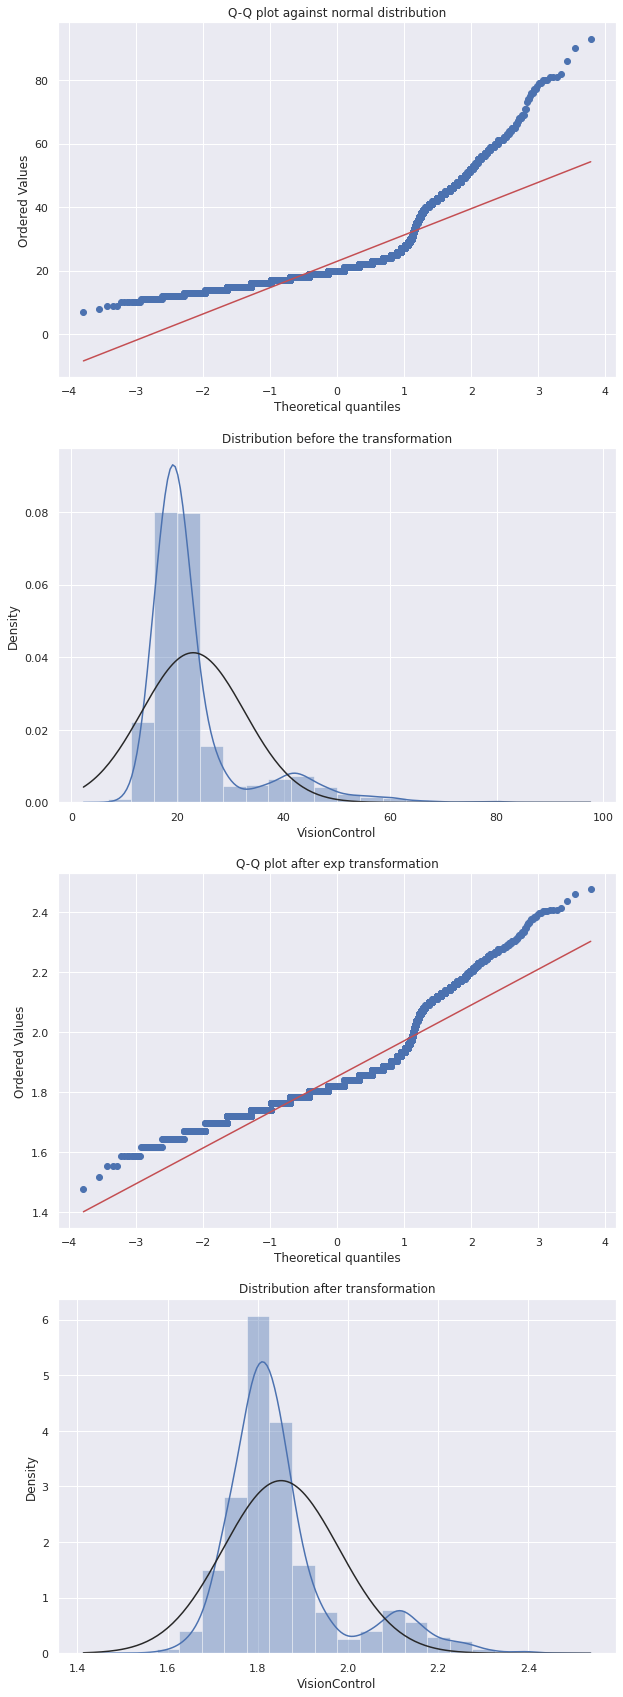

In [890]:
plot_transform("VisionControl","exp")

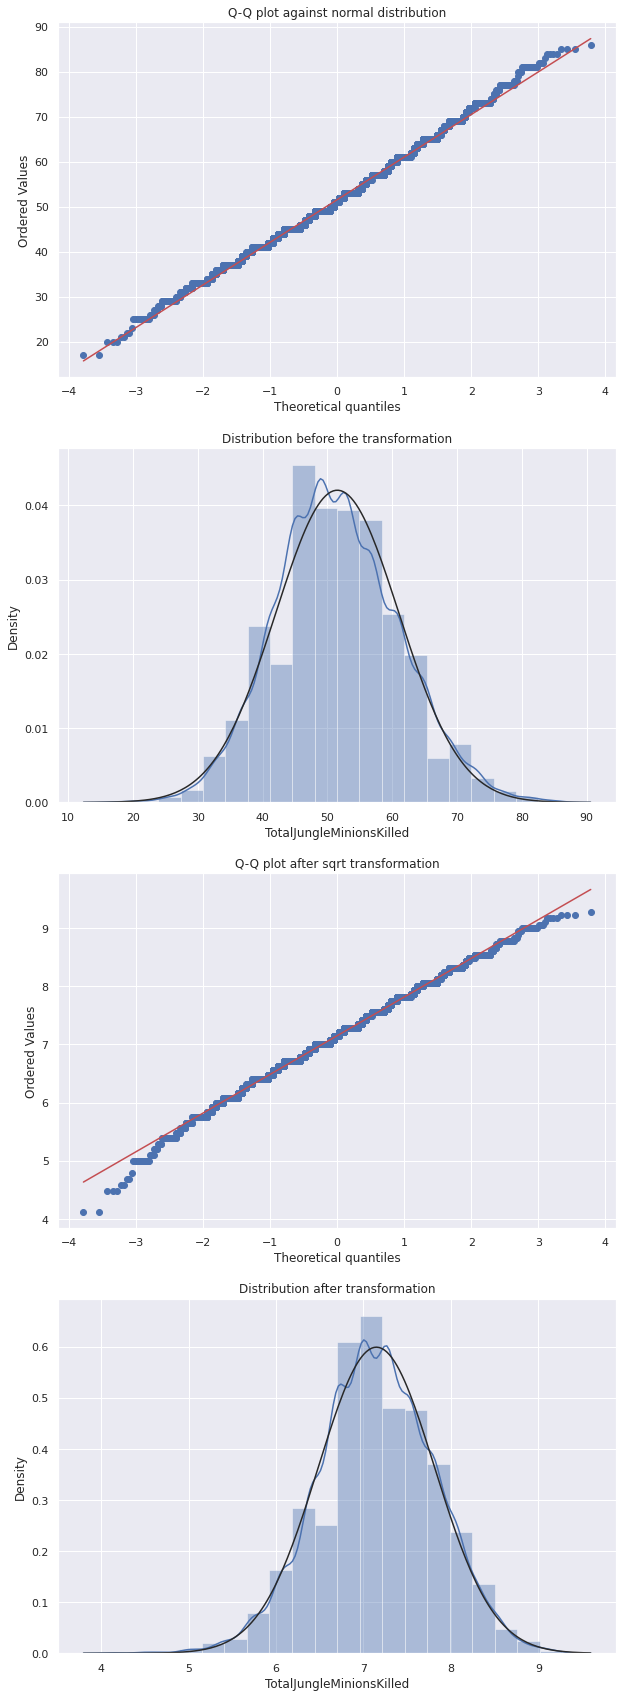

In [891]:
plot_transform("TotalJungleMinionsKilled","sqrt")

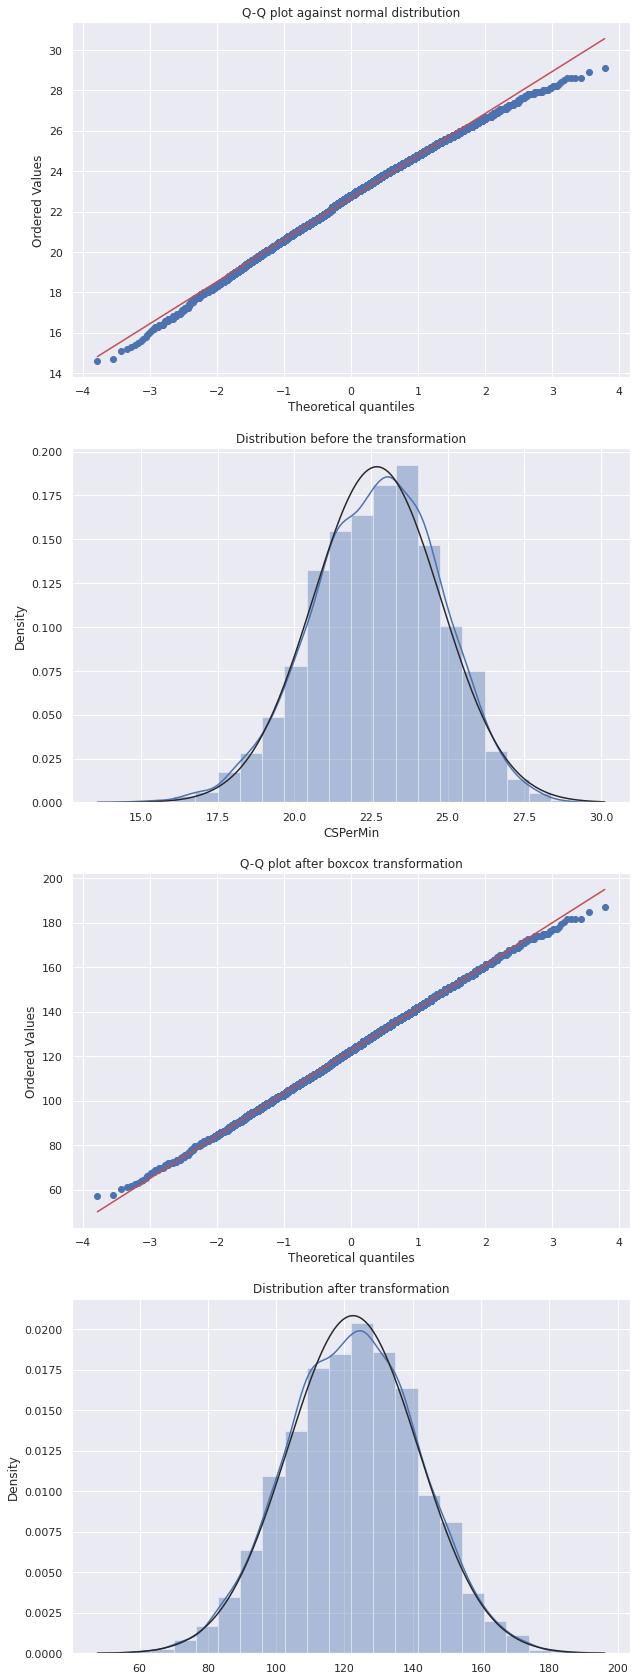

In [892]:
plot_transform("CSPerMin","boxcox")

So what I decided to do at the end is to use the box-cox transformation for the KDA and CSPerMin variables and log transform for the 

In [893]:
X,y = df[[c for c in df.columns if c not in ["Wins","Kills","Deaths","Assists"]]],df["Wins"]

In [894]:
clf = ExtraTreesClassifier(n_estimators=500)
clf = clf.fit(X, y)
print([(x,y) for x,y in sorted(zip(clf.feature_importances_,X.columns),reverse=True)])

[(0.22609925783089696, 'GoldDiff'), (0.1518543040895857, 'KDA'), (0.1125027924114485, 'CSPerMin'), (0.10545294287267488, 'TotalJungleMinionsKilled'), (0.09219764081085854, 'VisionControl'), (0.09180183380692947, 'WardsPlaced'), (0.08248689247498107, 'WardsDestroyed'), (0.07921236374762997, 'AvgLevel'), (0.033305626293223325, 'EliteMonsters'), (0.02508634566177164, 'FirstBlood')]


In [895]:
cols = [y for x,y in sorted(zip(clf.feature_importances_,X.columns),reverse=True)[:5]]

In [896]:
df_f = df[cols]

In [897]:
df_f.head()

GoldDiff       KDA  CSPerMin  TotalJungleMinionsKilled  VisionControl
0       643  3.333333      19.5                        36             30
1     -2908  2.000000      17.4                        43             13
2     -1172  1.000000      18.6                        46             15
3     -1321  1.800000      20.1                        55             44
4     -1004  2.000000      21.0                        57             79

In [898]:
df_f["KDA"],_ = boxcox(df_f["KDA"] + 1)
df_f["CSPerMin"],_ = boxcox(df_f["CSPerMin"])

In [899]:
df_f.head()

GoldDiff       KDA   CSPerMin  TotalJungleMinionsKilled  VisionControl
0       643  1.146345  86.684469                        36             30
1     -2908  0.911683  71.486806                        43             13
2     -1172  0.615312  80.027455                        46             15
3     -1321  0.864182  91.240433                        55             44
4     -1004  0.911683  98.249031                        57             79

In [900]:
X_train, X_test, y_train, y_test = train_test_split(df_f, y, test_size=0.2, random_state=42)

In [901]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [902]:
X_train.shape

(7109, 5)

In [903]:
X_test.shape

(1778, 5)

In [904]:
def display_scores(scores):
  print("Scores:", scores)
  print("Average:", scores.mean())
  print("Standard deviation:", scores.std())

## **Summary of the feature engineering section**

To summarize, what I've done during this section was:


*   Created two new features ( that I ended up using in the modeling stage )

*   Removed anomalies with the help of the isolation forest algorithm

*   Power transformed the subset of our features so they better fit the gaussian-like distribution

*   Chose the best 5 features with the help of the feature importance values using the extra random random forest classifier

*   Standarized the data

*   Split the data into train and test split

After the EDA and the feature engineering section, We are ready to start the modelling part of the project.


---





**Model building**
===

In [905]:
def plot_cm(cm):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.subplots(figsize=(20, 16))
  sns.heatmap(cm, annot=labels, fmt='')

In [906]:
def plot_roc_auc_curve(model,X,y):
  
  y_score = model.predict(X)

  fpr, tpr, thresholds = roc_curve(y, y_score)

  fig = px.area(
      x=fpr, y=tpr,
      title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
      labels=dict(x='False Positive Rate', y='True Positive Rate'),
      width=1600, height=950
  )
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')
  
  fig.show()

## **Logistic regression**

In [927]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [928]:
scores_lr = cross_val_score(lr_model, X_train, y_train, scoring="accuracy", cv=10)

In [929]:
display_scores(scores_lr)

Scores: [0.72855134 0.71448664 0.71026723 0.7116737  0.71729958 0.7580872
 0.72995781 0.72011252 0.70042194 0.6971831 ]
Average: 0.7188041045145698
Standard deviation: 0.016475084438785915


In [930]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       909
           1       0.69      0.69      0.69       869

    accuracy                           0.70      1778
   macro avg       0.70      0.70      0.70      1778
weighted avg       0.70      0.70      0.70      1778



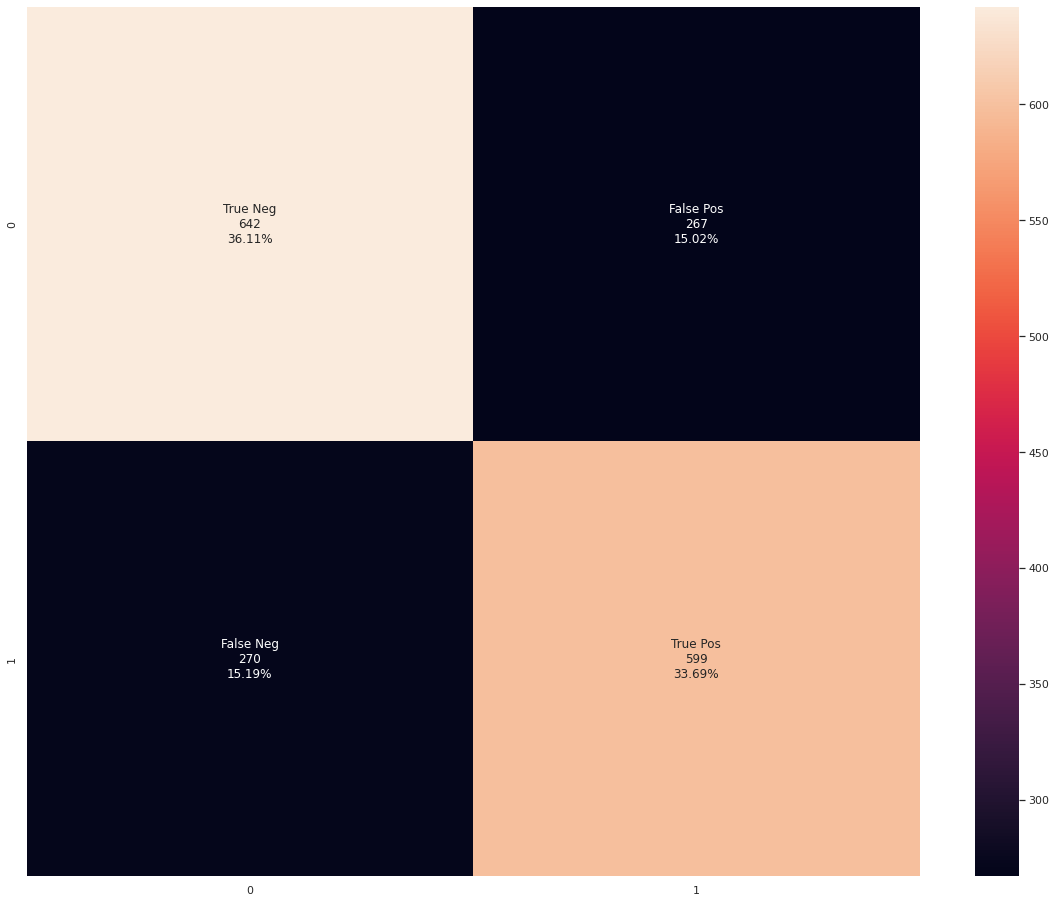

In [931]:
plot_cm(confusion_matrix(y_test,y_pred))

In [932]:
plot_roc_auc_curve(lr_model,X_test,y_test)

### **Grid Search**

In [933]:
grid={"C":np.logspace(-5,5,10),
      "penalty":['l1', 'l2', 'elasticnet', 'none'],
      'dual':[True,False],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

                 }

In [934]:
grid_lr_model=GridSearchCV(LogisticRegression(),grid,cv=5)

In [935]:
grid_lr_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   

In [936]:
best_lr_model = grid_lr_model.best_estimator_

In [937]:
best_lr_model.fit(X_train,y_train)

LogisticRegression(C=0.2782559402207126, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [938]:
scores_blr = cross_val_score(best_lr_model,X_train,y_train,scoring="accuracy",cv=6)

In [939]:
display_scores(scores_blr)

Scores: [0.72151899 0.71898734 0.71392405 0.74261603 0.72405063 0.69510135]
Average: 0.7193663996274755
Standard deviation: 0.014057480675672024


In [940]:
y_pred = best_lr_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       909
           1       0.69      0.69      0.69       869

    accuracy                           0.70      1778
   macro avg       0.70      0.70      0.70      1778
weighted avg       0.70      0.70      0.70      1778



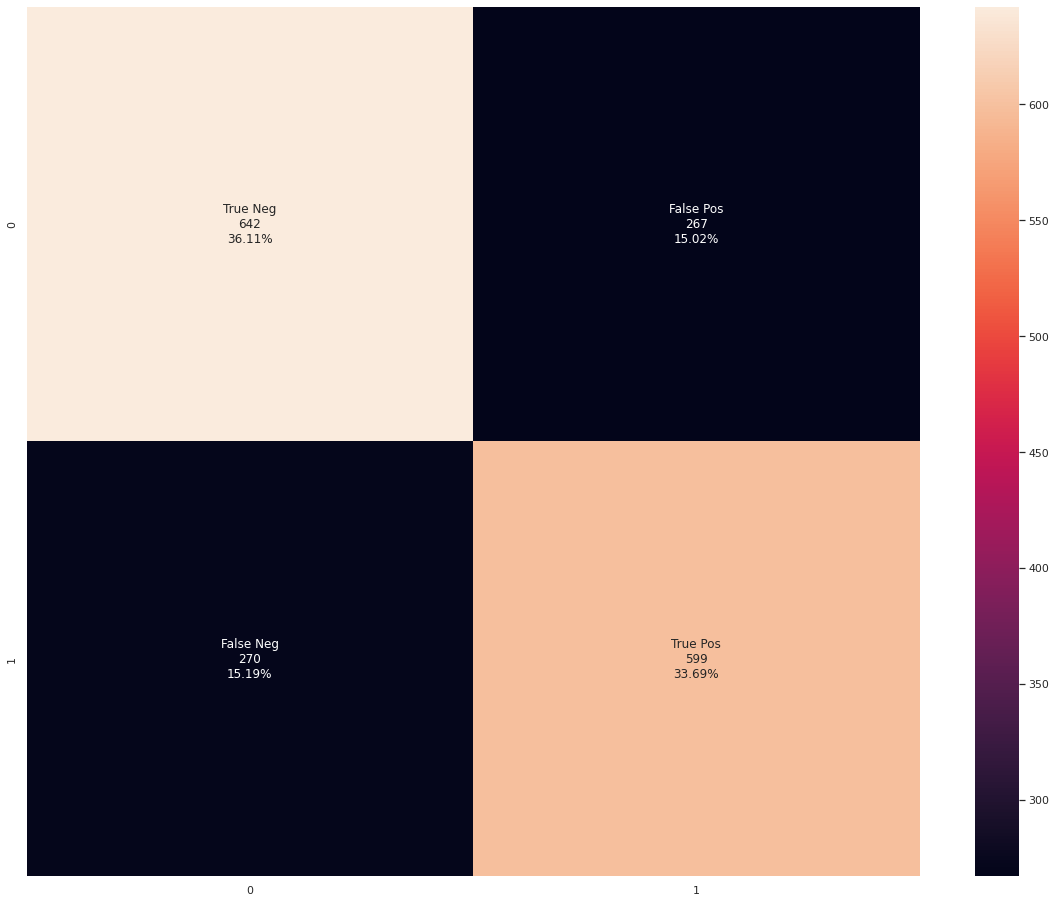

In [941]:
plot_cm(confusion_matrix(y_test,y_pred))

In [942]:
plot_roc_auc_curve(best_lr_model,X_test,y_test)

In [943]:
pickle.dump(best_lr_model,open('/content/drive/My Drive/Lol data/lr_model.pickle', 'wb'))

## **Support Vector Machine**

In [706]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [707]:
scores_svc = cross_val_score(svc_model, X_train, y_train, scoring="accuracy", cv=10)

In [915]:
display_scores(scores_svc)

Scores: [0.69338959 0.69901547 0.67510549 0.71870605 0.68213783 0.69057665
 0.7257384  0.73417722 0.72011252 0.71589311]
Average: 0.7054852320675106
Standard deviation: 0.018997236573730564


In [944]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       909
           1       0.69      0.68      0.69       869

    accuracy                           0.70      1778
   macro avg       0.70      0.70      0.70      1778
weighted avg       0.70      0.70      0.70      1778



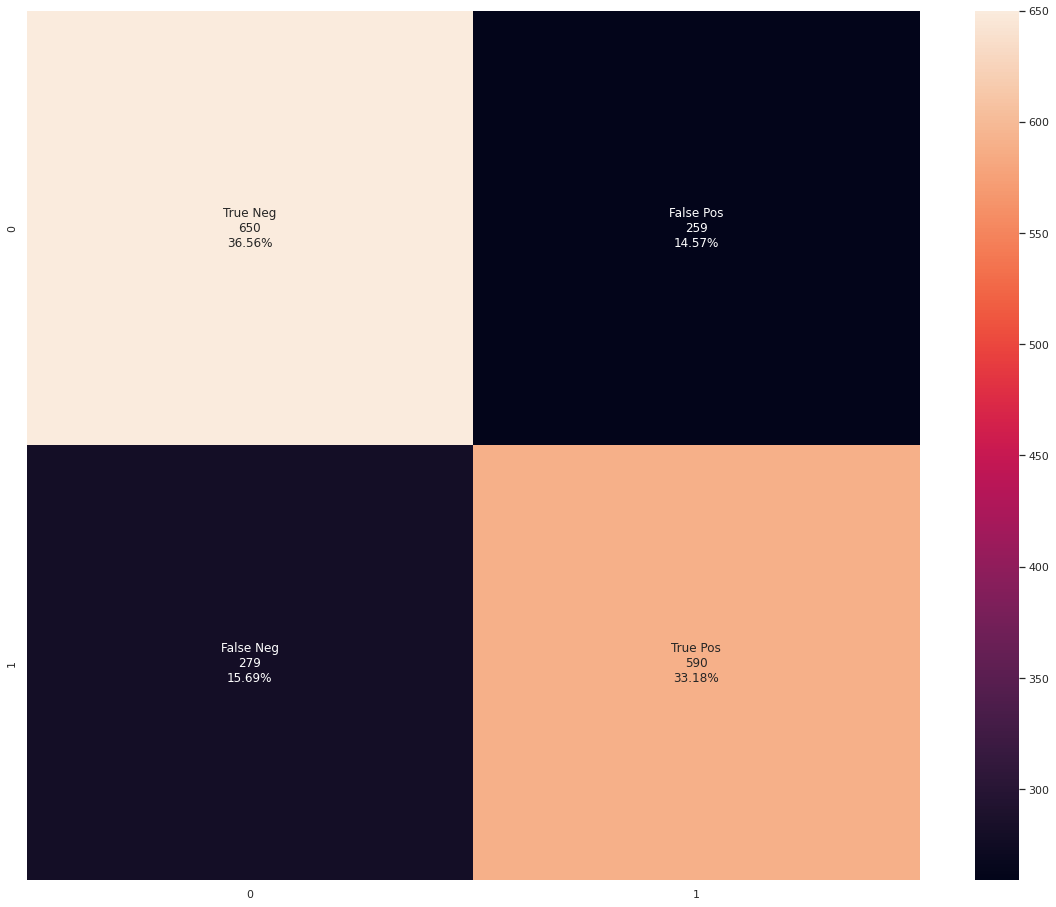

In [945]:
plot_cm(confusion_matrix(y_test,y_pred))

In [946]:
plot_roc_auc_curve(svc_model,X_test,y_test)

### **Grid Search**

In [766]:
param_grid = {'C':list(range(1,105,5)),'gamma':[1,0.5,0.25,0.1,0.001,0.0001], 'kernel':['linear','rbf','polynomial']}

In [767]:
svc_random = RandomizedSearchCV(estimator=SVC(probability=True),param_distributions=param_grid, cv = 5,n_iter=50, scoring='accuracy',verbose=2, n_jobs = -1)

In [768]:
svc_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 40.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46, 51, 56, 61, 66, 71, 76, 81,
                                              86, 91, 96, 101],
                                        'gamma': [1, 0.5, 0.25, 0.1, 0.001,
                                                  0.0001],
                                        'kernel': ['linear', 'rbf',
                                          

In [769]:
best_svc_model = svc_random.best_estimator_

In [770]:
best_svc_model.fit(X_train,y_train)

SVC(C=41, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [919]:
scores_bsvc = cross_val_score(best_svc_model, X_train, y_train, scoring="accuracy", cv=10)

In [947]:
display_scores(scores_bsvc)

Scores: [0.7257384  0.7116737  0.7116737  0.70886076 0.72151899 0.75668073
 0.7257384  0.72292546 0.70042194 0.69577465]
Average: 0.7181006715397873
Standard deviation: 0.016183420275365273


In [948]:
y_pred = best_svc_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       909
           1       0.69      0.68      0.69       869

    accuracy                           0.70      1778
   macro avg       0.70      0.70      0.70      1778
weighted avg       0.70      0.70      0.70      1778



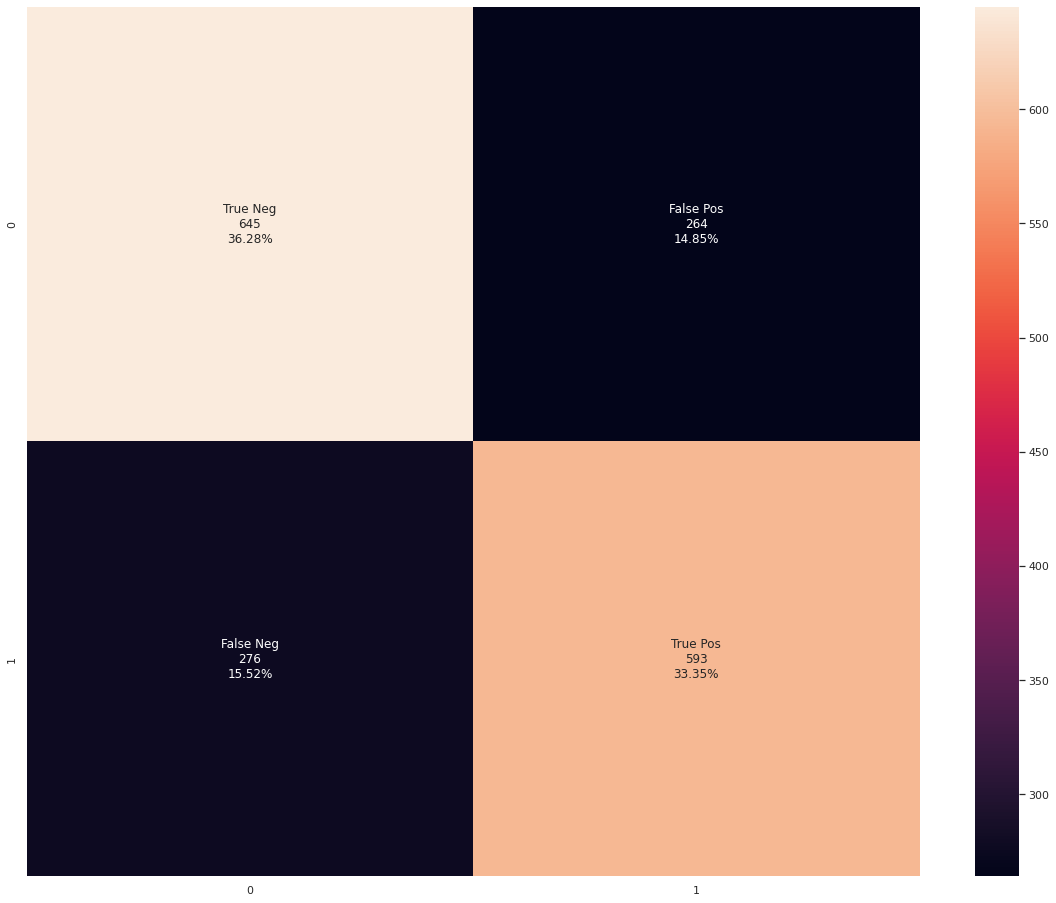

In [949]:
plot_cm(confusion_matrix(y_test,y_pred))

In [950]:
plot_roc_auc_curve(best_svc_model,X_test,y_test)

In [951]:
pickle.dump(best_svc_model,open('/content/drive/My Drive/Lol data/svc_model.pickle', 'wb'))

## **K-Nearest Neighbors**

In [713]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [716]:
scores_knn = cross_val_score(knn_model, X_train, y_train, scoring="accuracy", cv=10)

In [952]:
display_scores(scores_knn)

Scores: [0.66666667 0.67651195 0.64416315 0.67510549 0.64697609 0.64416315
 0.67791842 0.64135021 0.67088608 0.67510549]
Average: 0.6618846694796062
Standard deviation: 0.014820748098249749


In [953]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       909
           1       0.73      0.74      0.74       869

    accuracy                           0.74      1778
   macro avg       0.74      0.74      0.74      1778
weighted avg       0.74      0.74      0.74      1778



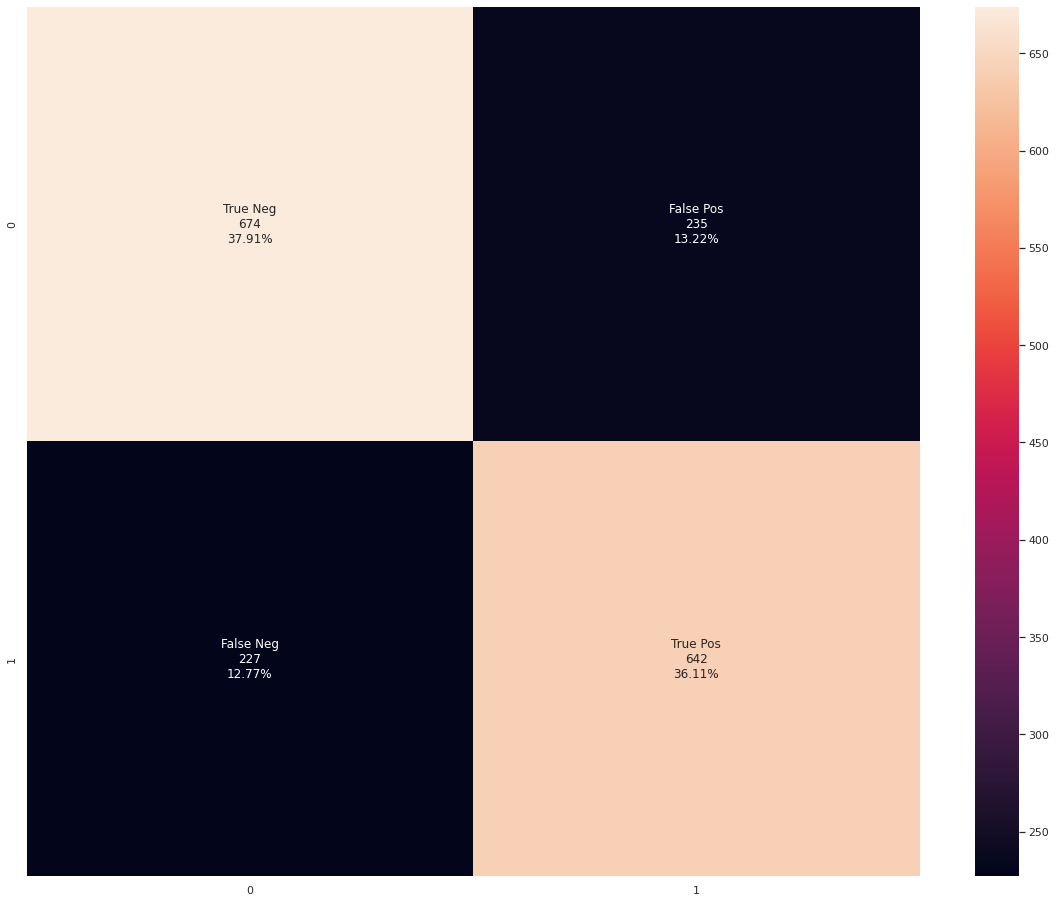

In [954]:
plot_cm(confusion_matrix(y_test,y_pred))

In [955]:
plot_roc_auc_curve(knn_model,X_test,y_test)

In [956]:
pickle.dump(knn_model,open('/content/drive/My Drive/Lol data/knn_model.pickle', 'wb'))

## **Random Forest Classifier**

In [729]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [730]:
scores_rf = cross_val_score(rf_model, X_train, y_train, scoring="accuracy", cv=10)

In [957]:
display_scores(scores_rf)

Scores: [0.68635724 0.67510549 0.66666667 0.69620253 0.66104079 0.66807314
 0.69479606 0.70604782 0.69620253 0.68213783]
Average: 0.6832630098452883
Standard deviation: 0.01436803689352703


In [958]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       909
           1       0.92      0.91      0.92       869

    accuracy                           0.92      1778
   macro avg       0.92      0.92      0.92      1778
weighted avg       0.92      0.92      0.92      1778



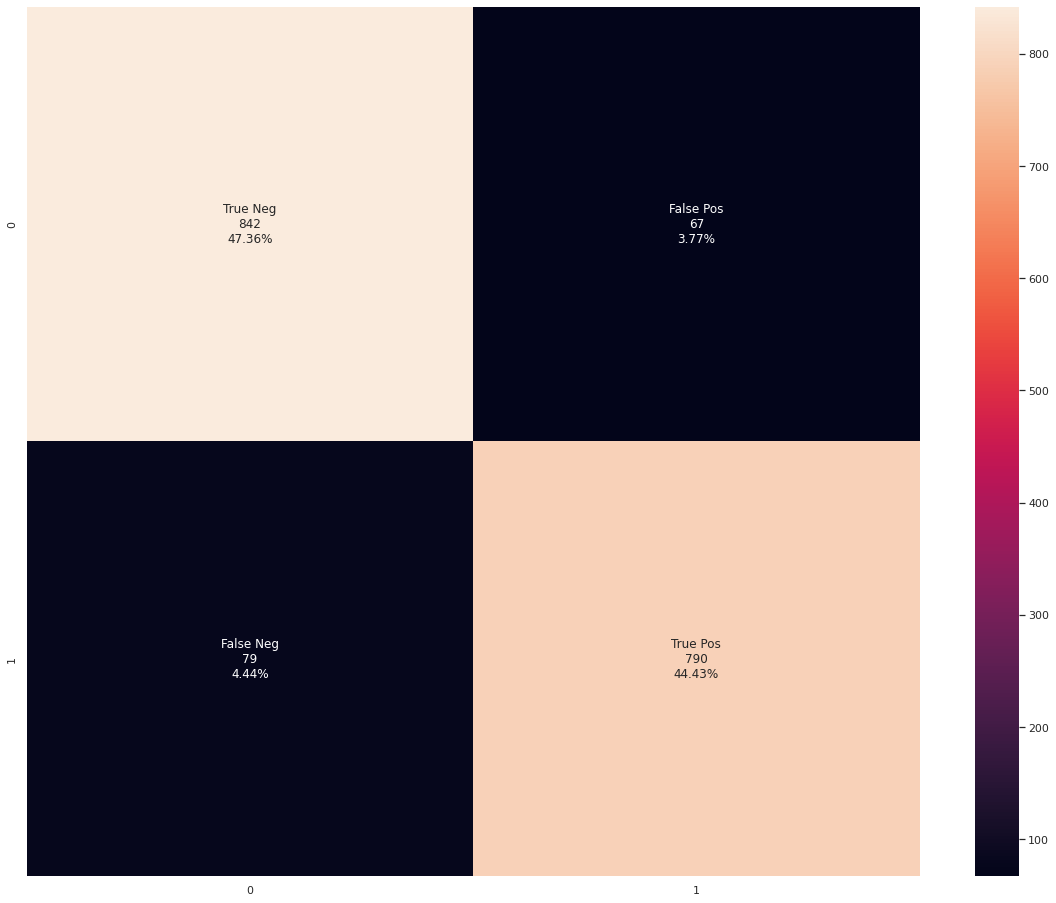

In [959]:
plot_cm(confusion_matrix(y_test,y_pred))

In [960]:
plot_roc_auc_curve(rf_model,X_test,y_test)

### **Grid Search**

In [736]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [737]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [738]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 78.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [741]:
best_rf_model = rf_random.best_estimator_

In [742]:
best_rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=650,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [749]:
scores_brf = cross_val_score(best_rf_model, X_train, y_train, scoring="accuracy", cv=10)

In [961]:
display_scores(scores_brf)

Scores: [0.69338959 0.68917018 0.67369902 0.69901547 0.67932489 0.67791842
 0.71870605 0.72714487 0.71589311 0.70745429]
Average: 0.6981715893108298
Standard deviation: 0.017692472791579598


In [962]:
y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       909
           1       0.76      0.74      0.75       869

    accuracy                           0.76      1778
   macro avg       0.76      0.76      0.76      1778
weighted avg       0.76      0.76      0.76      1778



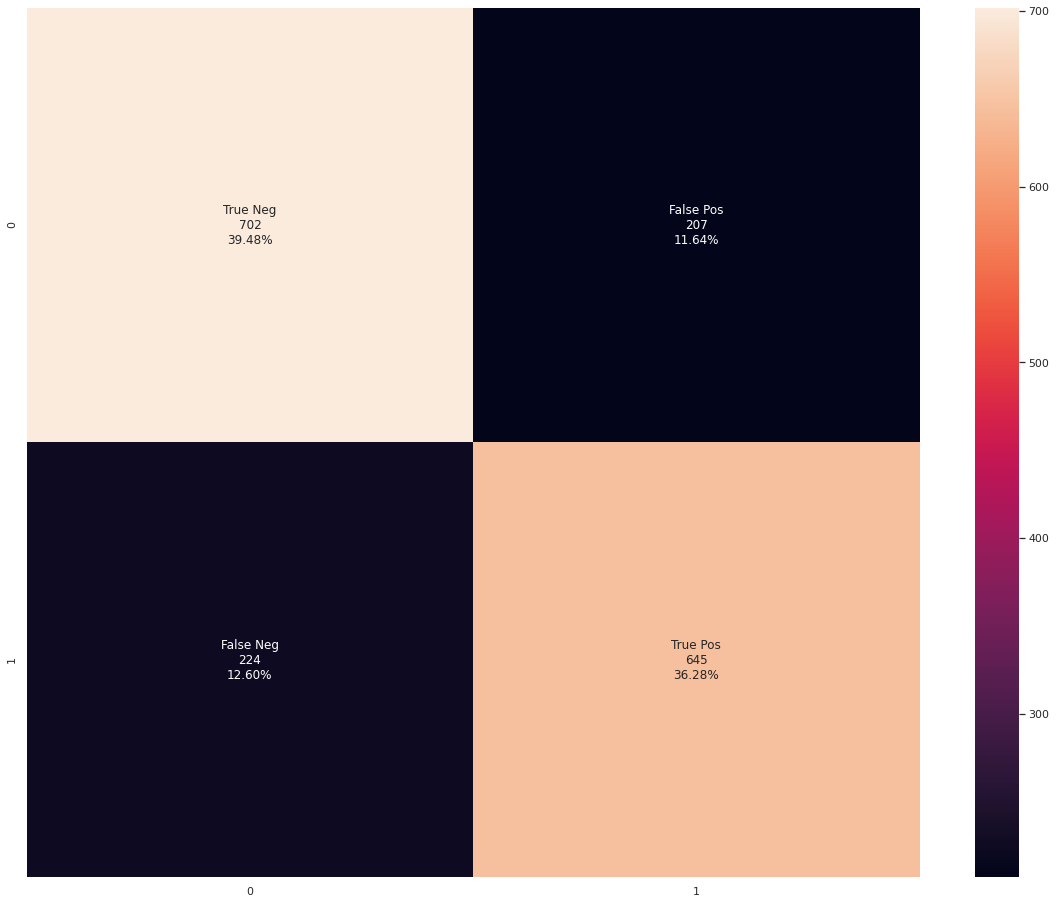

In [963]:
plot_cm(confusion_matrix(y_test,y_pred))

In [964]:
plot_roc_auc_curve(best_rf_model,X_test,y_test)

In [965]:
pickle.dump(best_rf_model,open('/content/drive/My Drive/Lol data/rf_model.pickle', 'wb'))